In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [2]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_25_10_2T3W1RFV0MC103811following_real_vehicle_rl0705_margin.bag'
b = bagreader(file_path)

[INFO]  Successfully created the data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_25_10_2T3W1RFV0MC103811following_real_vehicle_rl0705_margin.


In [3]:
filename = file_path.split('/')[-1]

In [4]:
b.topic_table

Topics                       Types  Message Count  \
0                 /accel            std_msgs/Float64           8638   
1             /cmd_accel            std_msgs/Float64           8606   
2               /cmd_vel         geometry_msgs/Twist           1728   
3              /commands            std_msgs/Float64           8647   
4   /effective_lead_dist            std_msgs/Float64           1723   
5             /highbeams            std_msgs/Float64             86   
6             /lead_dist            std_msgs/Float64            864   
7               /rel_vel         geometry_msgs/Twist           2625   
8                /rosout           rosgraph_msgs/Log             13   
9            /rosout_agg           rosgraph_msgs/Log              9   
10       /steering_angle            std_msgs/Float64           8660   
11             /track_a0  geometry_msgs/PointStamped           1734   
12             /track_a1  geometry_msgs/PointStamped           1734   
13            /track_a10  geometry_msgs/PointStamped           1732   
14            /track_a11  geometry_msgs/PointStamped           1732   
15            /track_a12  geometry_msgs/PointStamped           1732   
16            /track_a13  geometry_msgs/PointStamped           1732   
17            /track_a14  geometry_msgs/PointStamped           1729   
18            /track_a15  geometry_msgs/PointStamped           1727   
19             /track_a2  geometry_msgs/PointStamped           1734   
20             /track_a3  geometry_msgs/PointStamped           1734   
21             /track_a4  geometry_msgs/PointStamped           1734   
22             /track_a5  geometry_msgs/PointStamped           1734   
23             /track_a6  geometry_msgs/PointStamped           1732   
24             /track_a7  geometry_msgs/PointStamped           1734   
25             /track_a8  geometry_msgs/PointStamped           1734   
26             /track_a9  geometry_msgs/PointStamped           1734   
27          /v_des_delta            std_msgs/Float64           1724   
28                  /vel         geometry_msgs/Twist           4324   

       Frequency  
0     167.063809  
1     284.687708  
2      19.957196  
3     100.033485  
4      19.955202  
5       0.999647  
6      78.481822  
7      64.620210  
8   27413.751634  
9   30066.695341  
10    101.094362  
11     19.988963  
12     19.992964  
13     19.982868  
14     20.001736  
15     19.995347  
16     19.996396  
17     20.008558  
18     19.980821  
19     19.989248  
20     19.986772  
21     19.992107  
22     20.016722  
23     19.993727  
24     19.989153  
25     19.989439  
26     19.983915  
27     19.957290  
28     49.920899

In [5]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
CMD_VEL = b.message_by_topic('/cmd_vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
V_DES_DELTA = b.message_by_topic('/v_des_delta')
EFF_LEAD_DIST = b.message_by_topic('/effective_lead_dist')

In [6]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_v_des_delta = pd.read_csv(V_DES_DELTA)
df_cmd_vel = pd.read_csv(CMD_VEL)
df_eff_lead_dist = pd.read_csv(EFF_LEAD_DIST)
t0 = df_vel['Time'][0]

In [7]:
# df_v_des_delta

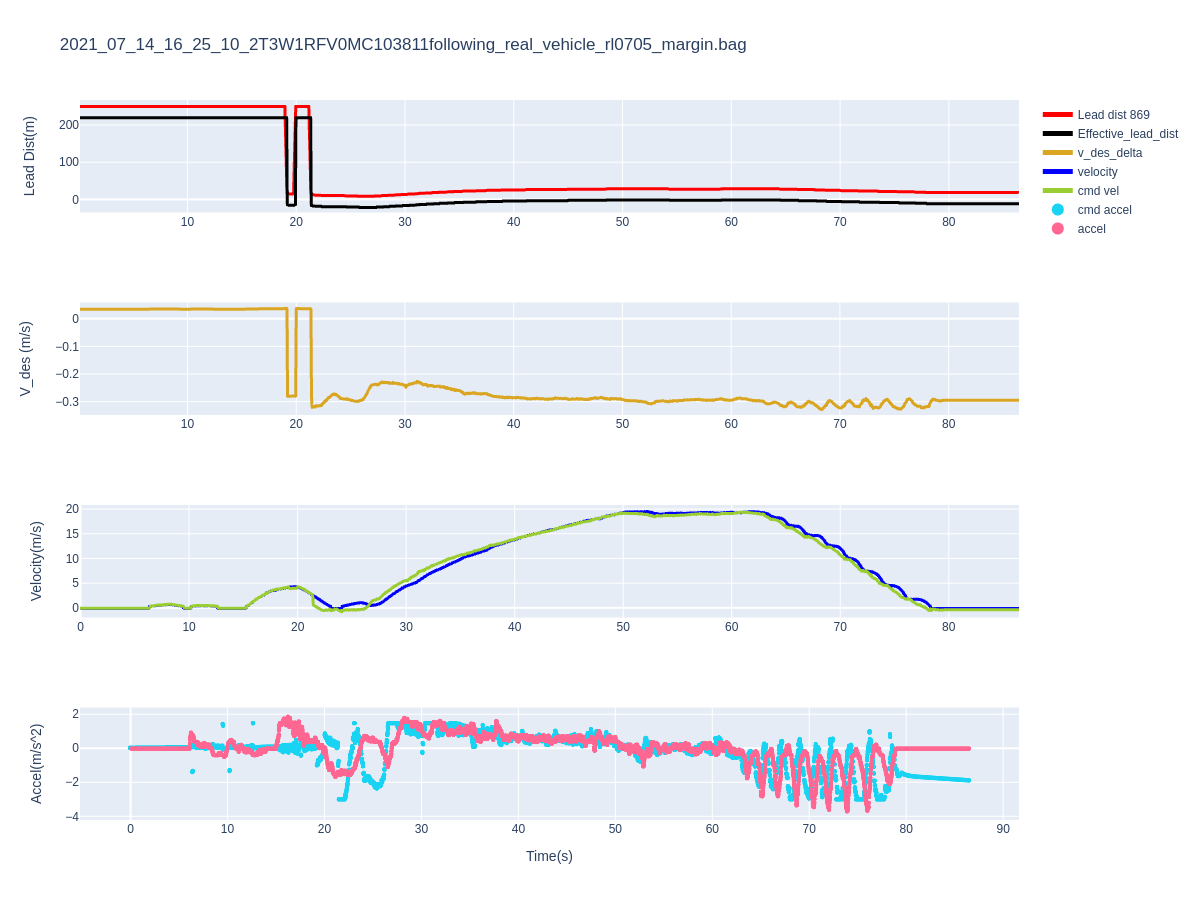

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_eff_lead_dist['Time']-t0,
    y=df_eff_lead_dist['data'],
     name="Effective_lead_dist",
      line=dict(
        width=3,
          color="black",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des_delta['Time']-t0,
    y=df_v_des_delta['data'],
     name="v_des_delta",
      line=dict(
        width=3,
          color="goldenrod",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="V_des (m/s)", row=2, col=1)
figr.update_yaxes(title_text="Velocity(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=800, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()